#  Small Circle inside Large Circle

#### Fernanda Weiss
#### Fabián Fernandez

Lo siguiente es un problema de clasificación, en donde los datos a clasificar son modelos no-lineales y linealemente inseparables. Es inseparable ya que al tener datos de entrada $x \in R^2$ y su etiqueta correspondiente $y \in \{−1, 1\}$, no existe un vector de pesos $w \in R^2$ y $b \in R$ tal que $y(w^Tx + b) \geq \rho > 0$

### a) Crear dataset de entrenamiento y prueba

(a) Escriba una funci´on que genere (aleatoriamente) n datos etiquetados de la forma {(x1, y1), . . . ,(xn, yn)}, xi ∈ R^2, yi ∈ {0, 1}, con una distribuci´on de probabilidad que refleje la configuraci´on linealmente
inseparable que muestra la Fig. 13
. Utilice esta funci´on para crear 1000 datos de entrenamiento y 1000
datos de pruebas. Para medir la tendencia de los modelos a sobre-ajuste, agregue un 5 % de ruido al
dataset, generando x’s cercanos a la frontera. Genere un gr´afico que muestre datos de entrenamiento y
pruebas, identificando cada clase con un color diferente (como lo muestra la Fig. 1).

Se crean dos conjuntos de datos, uno de entrenamiento y otro de prueba, cada uno contiene 1.000 datos de la forma  $\{(x_1, y_1), . . . ,(x_n, y_n)\}$, $x_i ∈ R^2$, $yi \in \{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente inseparable.

Además se agrega un 5% de ruido a los datos, generando nuevos $x_i$ cercanos a la frontera.

In [26]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),np.append(outer_circ_y, inner_circ_y))).T
    
    y = np.hstack([np.zeros(n // 2, dtype=np.intp), np.ones(n // 2, dtype=np.intp)])
    
    X += generator.normal(scale=noisy_n, size=X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    return X_train,y_train,X_test,y_test

In [45]:
X_no_noisy,y_no_noisy,X_no_noisy_test,y_no_noisy_test = do_circles(2000, 0)

In [46]:
import matplotlib.pyplot as plt
def visualize(x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    plt.title(title)
    plt.show()

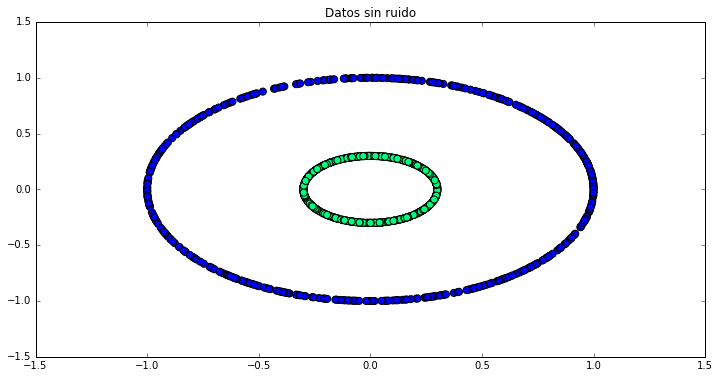

In [47]:
visualize(X_no_noisy, y_no_noisy, "Datos sin ruido")

In [50]:
X_train,y_train,X_test,y_test = do_circles(2000, 0.05)

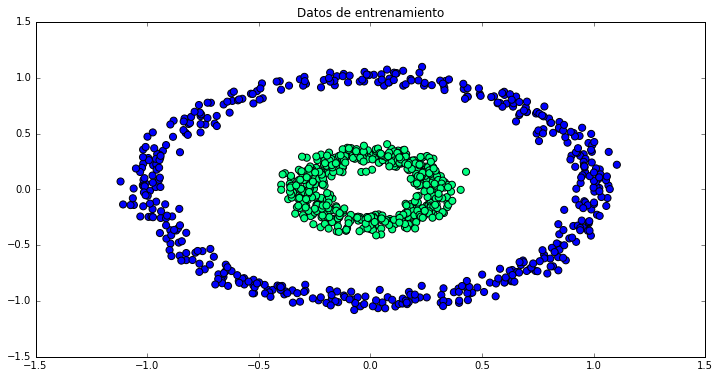

In [51]:
visualize(X_train, y_train, "Datos de entrenamiento")

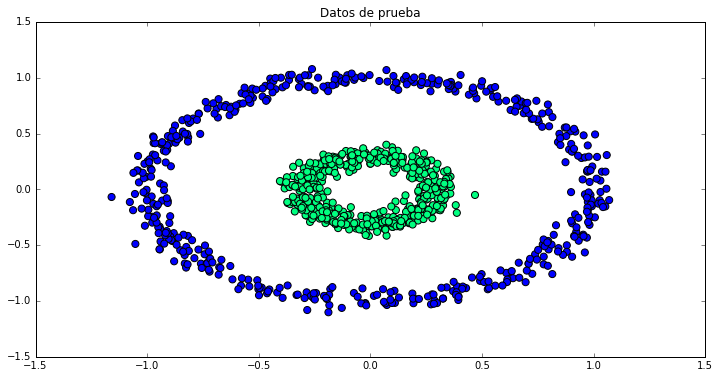

In [53]:
visualize(X_test, y_test, "Datos de prueba")

Mediante la primera gráfica se puede ver como sería un dataset generado sin ruido. Luego se muestra el dataset de entrenamiento y prueba, respectivamente, con el 5% de ruido inducido.

Para lo que sigue, se utilizará la siguiente función para graficar las fronteras de clasificación en
base a la probabilidad, definida por un algoritmo, de un ejemplo a pertenecer a una clase en particular.

In [54]:
def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='Greys')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()

### b) Red neuronal artificial con una neurona

Se intenta resolver el problema de clasificación con una red neuronal artificial con solo una neurona, es decir, sin capas escondidas. 

(b) Demuestre experimentalmente que una red neuronal artificial correspondiente a 1 sola neurona (i.e.
sin capas escondidas) no puede resolver satisfactoriamente el problema. Puede utilizar la funci´on de
activaci´on y el m´etodo de entrenamiento que prefiera. Sea convincente: por ejemplo, intente modificar
los par´ametros de la m´aquina de aprendizaje, reportando m´etricas que permitan evaluar el desempe˜no
del modelo en el problema con cada cambio efectuado. Adapte tambi´en la funci´on plot classifier para
que represente gr´aficamente la soluci´on encontrada por la red neuronal. Describa y explique lo que
observa, reportando gr´aficos de la soluci´on s´olo para algunos casos representativos.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

n_h=1
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_h, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)
scores = model.evaluate(X_test, y_test)
test_acc = scores[1]

Using TensorFlow backend.


NameError: name 'X_train' is not defined

(c) Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el m´etodo de entrenamiento
que prefiera, pero en esta actividad puede optar tranquilamente por usar los hiper-par´ametros que se entregan como referencia en el c´odigo de ejemplo. Cambie el n´umero de neuronas Nh en la red entre 2
y 32 en potencias de 2, graficando el error de entrenamiento y pruebas como funci´on de Nh. Describa y
explique lo que observa. Utilice la funci´on plot classifier, dise˜nada anteriormente, para construir gr´aficos
de la soluci´on en algunos casos representativos.

In [14]:
n_h=32
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

(d) Demuestre experimentalmente que stump (´arbol de clasificaci´on de 1 nivel) no puede resolver satisfactoriamente el problema anterior. Puede utilizar el criterio y la funci´on de partici´on que prefiera. Sea convincente: por ejemplo, intente modificar los par´ametros de la m´aquina, reportando m´etricas que
permitan evaluar el desempe˜no del modelo en el problema con cada cambio efectuado. Adapte tambi´en
la funci´on plot classifier para que represente gr´aficamente la soluci´on encontrada por el ´arbol. Describa
y explique lo que observa, reportando gr´aficos de la soluci´on s´olo para algunos casos representativos.

Test Accuracy = 0.670000
1


/home/fefi/tensorflow/local/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/fefi/tensorflow/local/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


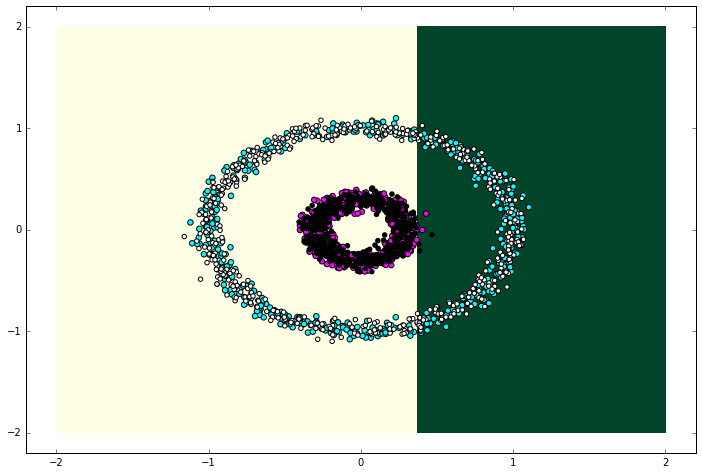

In [17]:
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=1)
clf.fit(X_train,y_train)
acc_test = clf.score(X_test,y_test)
print "Test Accuracy = %f"%acc_test
print clf.tree_.max_depth
plot_classifier(clf,X_train,y_train,X_test,y_test,'tree')

(e) Demuestre experimentalmente que un ´arbol de clasificaci´on de m´ultiples niveles puede resolver satisfactoriamente el problema estudiado. Puede utilizar el criterio y la funci´on de partici´on que prefiera,
pero puede optar tranquilamente por usar los hiper-par´ametros que se entregan como referencia en el
c´odigo de ejemplo. Cambie el n´umero de niveles admitidos en el ´arbol Nt entre 2 y 20, graficando el
error de entrenamiento y pruebas como funci´on de Nt. Describa y explique lo que observa. Utilice la
funci´on plot classifier, dise˜nada anteriormente, para construir gr´aficos de la soluci´on en algunos casos
representativos.

In [19]:
n_t=8
clf=Tree(criterion='gini',splitter='best',random_state=0,max_depth=n_t)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

(f) Como ya se demostr´o experimentalmente que este problema es linealmente inseperable, ahora se pide
experimentar otra alternativa. Para ello deber´a realizar una proyecci´on de los datos a un nuevo espacio
dimensional (manifold) en el cual se reconozcan sus patrones no lineales, para poder trabajarlos con
fronteras lineales. Utilice la t´ecnica de PCA con la ayuda de un Kernel Gaussiano ([2]) para extraer
sus vectores con dimensi´on infinita de mayor varianza.

In [21]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

(g) Ajuste un algoritmo de aprendizaje con fronteras lineal para los datos proyectados en este nuevo espacio
que captura sus componentes no lineales, muestre graficamente que el problema ahora puede ser resulto
con estos m´etodos. Reporte m´etricas para evaluar el desempe˜no, comente y concluya.